<a href="https://colab.research.google.com/github/gbsant/ocorrencias_aereas/blob/main/Analise_Ocorrencias_Aereas_no_Brasil_de_2010_a_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from collections import Counter
import statistics as static

**NumPy**

NumPy é usada principalmente para realizar cálculos em Arrays Multidimensionais. O NumPy fornece um grande conjunto de funções e operações de biblioteca que ajudam os programadores a executar facilmente cálculos numéricos (MEDIUM, 2018).


**Pandas**

A biblioteca Pandas é utilizada para análise de dados. O Pandas vem com um conjunto de opções e configurações alteráveis pelo usuário. Eles podem aumentar muito a produtividade, pois permitem que você personalize o ambiente do Pandas exatamente de acordo com suas preferências. EX: alterar algumas das configurações de exibição do Pandas para alterar quantas linhas e colunas são mostradas e com que precisão os números de ponto flutuante são exibidos (VOITTO, 2021)


**Matplotlib**

Matplotlib é uma biblioteca para criação de gráficos e visualização de dados em geral e foi feita para a linguagem de programação Python. Além disso, ele oferece uma interface de programação orientada a objetos para incluir gráficos através de toolkits de interface gráfica como o Tkinter, Wxpython, Qt ou GTK (MEDIUM, 2020).


**Seaborn**

A biblioteca Seaborn trabalha em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada (VOOOO, 2017).


**Scipy/scipy.stats**

O SciPy é o pacote principal de rotinas científicas em Python, que se destina a operar de forma eficiente em matrizes numpy, de modo que numpy e scipy trabalhem lado a lado. scipy contém várias ferramentas dedicadas a problemas comuns em computação científica. Seus diferentes sub-módulos correspondem a diferentes aplicações, tais como interpolação, integração, otimização, processamento de imagens, estatísticas, funções especiais, etc (UFPR, ?).


**Collections counter**

Um Counter é uma subclasse de dict subclass para contagem de objetos hasheáveis. É uma coleção na qual elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário. Contagens podem ser qualquer valor inteiro incluindo zero e contagens negativas. A classe Counter é similar a sacos ou multiconjuntos em outras linguagens (PYTHON, ?)

# Adicionando o dado exato nos gráficos em barras horizontais

In [10]:
#exibir dados no gráfico quando este for em barras horizontais
def numero_em_cima(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() /2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# Importação dos dados

In [11]:
#importação dos dados
dados = pd.read_csv('/content/ocorrencias_cenipa.csv')

In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo                     5242 non-null   int64 
 1   tipo                       5242 non-null   object
 2   descricao                  5242 non-null   object
 3   cidade                     5242 non-null   object
 4   estado                     5242 non-null   object
 5   data                       5242 non-null   object
 6   ano                        5242 non-null   int64 
 7   hora                       5242 non-null   object
 8   aeronave_liberada          5242 non-null   object
 9   status_investigacao        5242 non-null   object
 10  aeronaves_envolvidas       5242 non-null   int64 
 11  ocorrencia_saida_pista     5242 non-null   object
 12  aeronave_tipo              5242 non-null   object
 13  aeronave_fabricante        5242 non-null   object
 14  motor_ti

In [13]:
dados.describe()

,codigo,ano,aeronaves_envolvidas,aeronave_assentos,aeronave_ano_fabricacao
count,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000
mean,56472.458985,2014.180847,1.011828,27.575353,1863.320870
std,13045.616926,2.849750,0.111593,54.528085,507.051481
min,39115.000000,2010.000000,1.000000,0.000000,0.000000
25%,46024.500000,2012.000000,1.000000,2.000000,1978.000000
50%,51693.500000,2014.000000,1.000000,6.000000,1992.000000
75%,66450.750000,2017.000000,1.000000,10.000000,2007.000000
max,79227.000000,2019.000000,3.000000,384.000000,9999.000000



# Número de ocorrências por tipo 



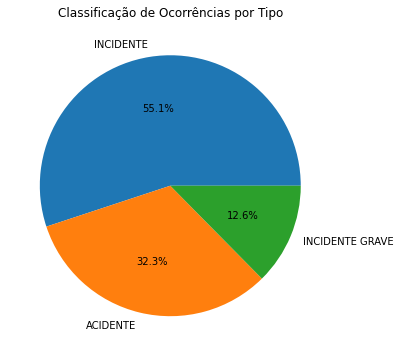

In [14]:
dados['tipo'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,title="Classificação de Ocorrências por Tipo" ,figsize=(6, 6),label='')
plt.show()


Dos 5242 casos a porcentagem de **incidentes**, ocorrências com menor gravidade, segue com 55,1%, **incidentes graves** representam o total de 12,6%.

Acidentes representam 32,3% dos casos relacionados ao gráfico, cerca de 80% de todos os acidente na aviação ocorreram antes, durante ou depois da decolagem ou da aterrissagem, e são frequentemente identificados como resultado de erro humano.

# Ocorrências por cidade 


In [15]:
cidade = Counter(dados['cidade'])
top_cidade = sorted(cidade, key = cidade.get, reverse = True)
contador_cidade = sorted(list(cidade.values()), reverse = True)

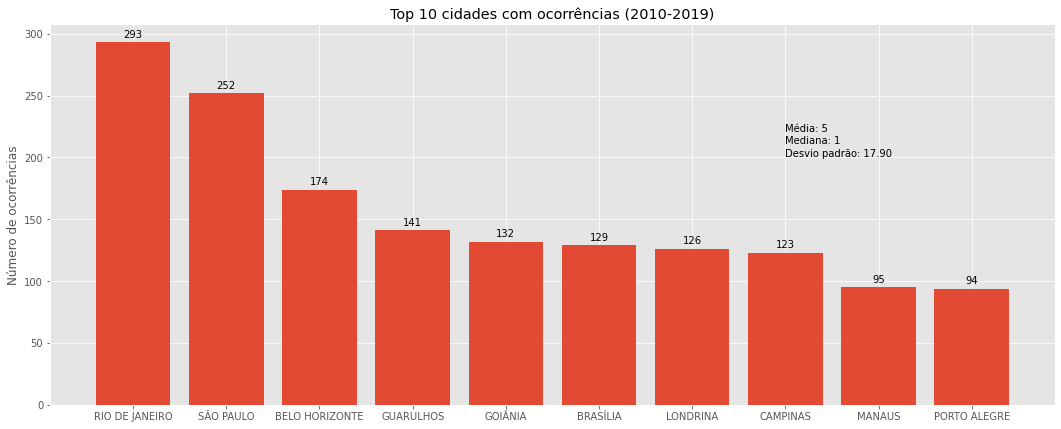

In [16]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 7))

x=top_cidade[:10]
y=contador_cidade[:10]

rects1=ax.bar(x, y,)

ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Top 10 cidades com ocorrências (2010-2019)')
plt.text(7, 210.9, 'Mediana: %d'%(np.median(np.array(contador_cidade))))
plt.text(7, 220.9, 'Média: %d'%(np.mean(np.array(contador_cidade))))
plt.text(7, 200.8, 'Desvio padrão: %.2f'%(static.stdev(contador_cidade)))   

numero_em_cima(rects1, ax)

plt.show()

Se observarmos o gráfico dentre as 10 cidade com maior número de ocorrências o Rio de janeiro foi oque obteve o índice maior com 293 casos, ‎além ‎‎da ‎‎ ‎‎alta ‎‎demanda ‎‎por ‎‎ voos ‎‎comerciais ‎‎e ‎‎ ‎‎privados, ‎‎a ‎‎geografia ‎‎da ‎‎ ‎‎rota ‎‎não ‎‎é ‎‎favorável. ‎

A cidade de Porto Alegre obteve o menor índice, com apenas 94 casos de ocorrência.

A média de ocorrência por cidades ficou em torno de 5.03, conforme observado no gráfico

# Ocorrências por estado 

In [17]:
estado = Counter(dados['estado'])
top_estado = sorted(estado, key = estado.get, reverse = True)
contador_estado = sorted(list(estado.values()), reverse = True)

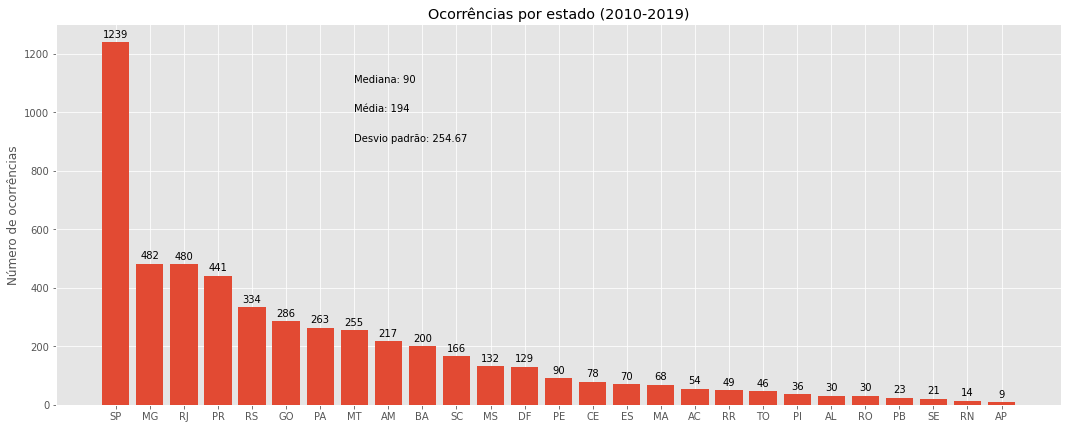

In [18]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 7))

x=top_estado
y=contador_estado

rects1=ax.bar(x, y,)

ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Ocorrências por estado (2010-2019)')
plt.text(7, 1100.9, 'Mediana: %d'%(np.median(np.array(contador_estado))))
plt.text(7, 1000.9, 'Média: %d'%(np.mean(np.array(contador_estado))))
plt.text(7, 900.8, 'Desvio padrão: %.2f'%(static.stdev(contador_estado)))   

numero_em_cima(rects1, ax)

plt.show()

Se observamos o estado com maior índice de ocorrências foi São Paulo-SP com 1239 casos, cerca de 40% são aviões particulares. Na aviação regular, no qual inclui voos comerciais de passageiros, esse percentual não chega a 1,5% das ocorrência de acidentes, de acordo com o sumário estatístico.

O estados com menor índice de ocorrência foi Amapá-AP, com apenas 9 casos, devido a baixa solicitação de voos.

A média de ocorrência por estado ficou em torno de 194. Sendo que São Paulo corresponde a 23,86% dos casos.


# Ocorrências por ano

In [19]:
# Conversão da variavel "ano" de int para string
dados['ano'] = dados['ano'].apply(str)

In [20]:
ano = Counter(dados['ano'])
top_ano = list(ano.keys())
contador_ano = list(ano.values())

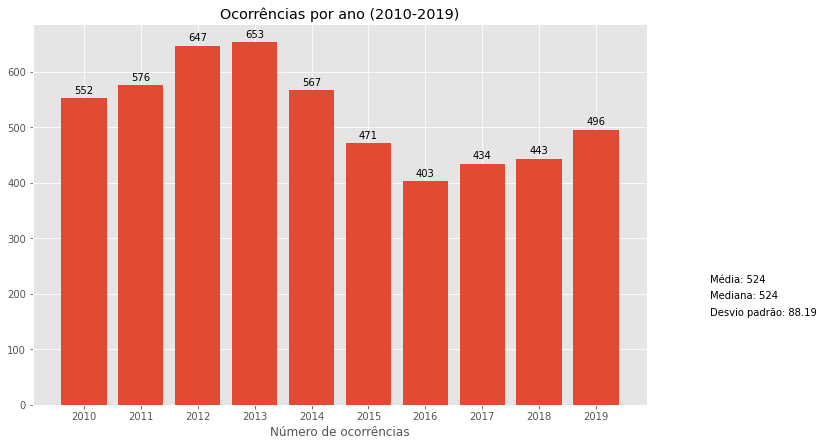

In [21]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(11, 7))

x=top_ano
y=contador_ano

rects1=ax.bar(x, y,)

ax.set_xticks(x)

plt.xlabel("Número de ocorrências")
plt.title('Ocorrências por ano (2010-2019)')
plt.text(11, 190.9, 'Mediana: %d'%(np.median(np.array(contador_ano))))
plt.text(11, 220.9, 'Média: %d'%(np.mean(np.array(contador_ano))))
plt.text(11, 160.8, 'Desvio padrão: %.2f'%(static.stdev(contador_ano)))   

numero_em_cima(rects1, ax)

plt.show()

Conforme notamos no gráfico o ano com **mais ocorrência**, foi em 2013 com **(653)**. 
O ano com **menos ocorrências** foi em 2016,com **(403)** casos, comparando com o ano de 2013, tivemos uma queda de 38,40%. 

A média de ocorrência por ano é de **524**.

# Ocorrências por hora 

In [22]:
hora = Counter(dados['hora'])
top_hora = sorted(hora, key = hora.get, reverse = True)
contador_hora = sorted(list(hora.values()), reverse = True)

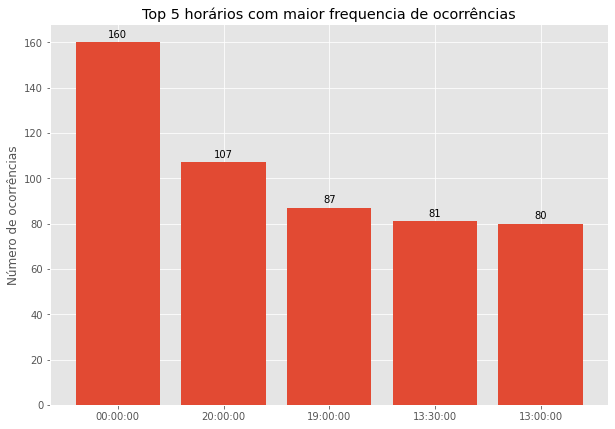

In [23]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(10, 7))

x=top_hora[:5]
y=contador_hora[:5]

rects1=ax.bar(x, y,)

ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Top 5 horários com maior frequencia de ocorrências') 

numero_em_cima(rects1, ax)

plt.show()

Observamos que o horário com maior frequência de ocorrências, foi as 00:00 com (160), correspondendo a 31,20% dos casos.

A maior partes das ocorrências, está relacionadas ao periodo noturno, sendo que na boa parte dos casos, são em situações de pousos.


# Liberação de aeronaves 

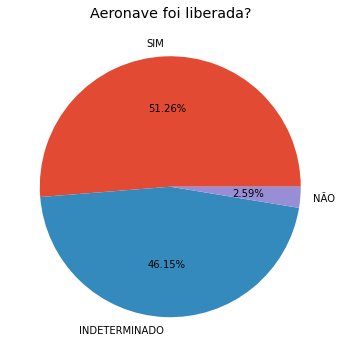

In [24]:
dados['aeronave_liberada'].value_counts().plot(kind='pie',autopct='%1.2f%%' ,title="Aeronave foi liberada?" ,figsize=(6, 6),label='')
plt.show()

Nota-se no gráfico que maior porcentagem de ocorrência,está em torno das aeronaves liberadas, representando 51,3%.

As ocorrências indeterminadas corrêsponde a 46,15% e aeronaveis não liberadas a 2,59%.


# Status da investigação das ocorrências 

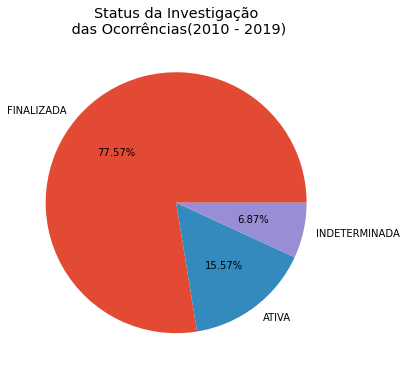

In [25]:
dados['status_investigacao'].value_counts().plot(kind='pie',autopct='%1.2f%%' ,title="Status da Investigação\n das Ocorrências(2010 - 2019)" ,figsize=(6, 6),label='')
plt.show()

Observamos que neste gráfico a maior das ocorrências teve sua investigação finalizada, represetando 77,57%, totalizandob (4066) casos.

As ocorrências indeterminadas representam cerca de 6,87%, que se tratam de processos não definidos, trazendo o total de (360) casos não determinados.

Ocorrências ativas representam 15,57%, dos 84 % de casos indeterminados e finalizados, representando (81) ativos por cada ano.


# Aeronaves envolvidas por ocorrência 

In [26]:
aeronaves_envolvidas = Counter(dados['aeronaves_envolvidas'])
top_aeronaves_envolvidas = sorted(aeronaves_envolvidas, key = aeronaves_envolvidas.get, reverse = True)
contador_aeronaves_envolvidas = sorted(list(aeronaves_envolvidas.values()), reverse = True)

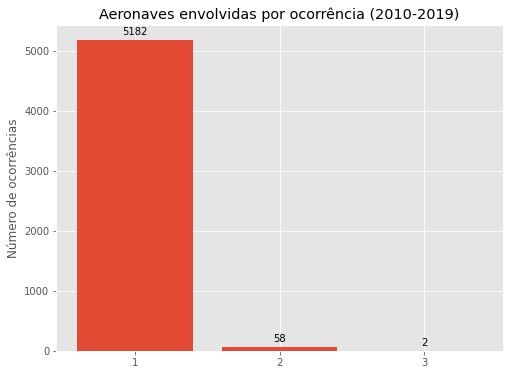

In [27]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(8, 6))

x=top_aeronaves_envolvidas
y=contador_aeronaves_envolvidas

rects1=ax.bar(x, y,)

ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Aeronaves envolvidas por ocorrência (2010-2019)')

numero_em_cima(rects1, ax)

plt.show()

Conforme identificamos no gráfico, a maior parte das ocorrências envolve apenas uma aeronave com 5182 casos. Sendo superior em comparação as ocorrências com 2 aeronaves totalizando (58) casos e com 3 aeronaves totalizando (2) casos envolvidos, em 9 anos.

# Ocorrências em saída de pista 

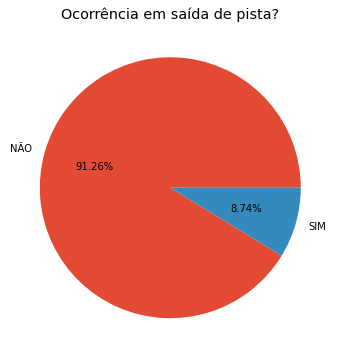

In [28]:
dados['ocorrencia_saida_pista'].value_counts().plot(kind='pie',autopct='%1.2f%%' ,title="Ocorrência em saída de pista?" ,figsize=(6, 6),label='')
plt.show()

A maior taxa refere-se a ocorrência não relacionadas a saída de pista, com total de 91,26%, se tratando de outras eventualidades, apenas 8.74% está ligado a saídas de pistas, sendo relacionado a colisão com obstáculos na decolagem.


# Ocorrências por tipo de aeronave 

In [29]:
aeronave_tipo = Counter(dados['aeronave_tipo'])
top_aeronave_tipo = sorted(aeronave_tipo, key = aeronave_tipo.get, reverse = False)
contador_aeronave_tipo = sorted(list(aeronave_tipo.values()), reverse = False)

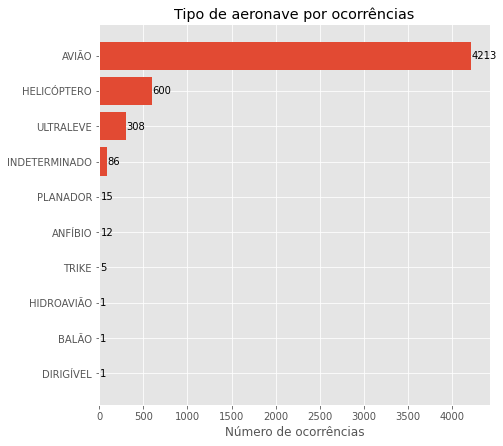

In [30]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(7, 7))

x=top_aeronave_tipo
y=contador_aeronave_tipo

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.barh(x, y,)

plt.xlabel("Número de ocorrências")
plt.title('Tipo de aeronave por ocorrências')

plt.show()

Notamos que as maiorias das ocorrência estão relacionadas aos aviões, helicópteros, ultraleves e indeterminado. Tendo em vista que o índice supeior está ligado aos aviões, representando 80,35%. Maioria dos problemas são causados por atitude dos pilotos, condições meteorológicas adversas, desorientação espacial e a indisciplina de voo. As outras aeronaves como dirigível, ‎‎Balão ‎‎e ‎‎Hidroaviao ‎‎tiveram ‎‎o ‎‎menor número de ‎‎ocorrências.


# Ocorrências por fabricantes

In [31]:
aeronave_fabricante = Counter(dados['aeronave_fabricante'])
top_aeronave_fabricante = sorted(aeronave_fabricante, key = aeronave_fabricante.get, reverse = True)
contador_aeronave_fabricante = sorted(list(aeronave_fabricante.values()), reverse = True)

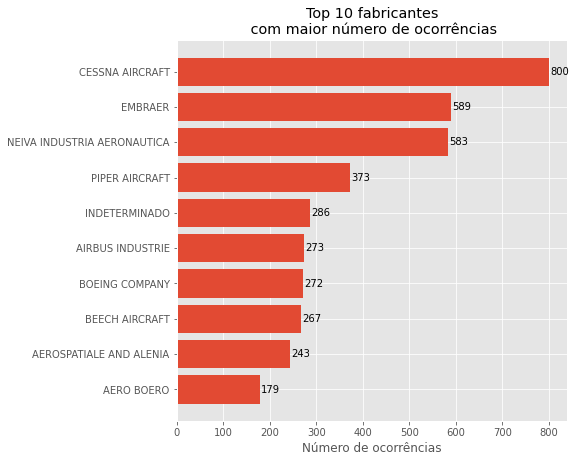

In [32]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(7, 7))

x=top_aeronave_fabricante[:10]
y=contador_aeronave_fabricante[:10]

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.barh(x, y,)

ax.invert_yaxis()
plt.xlabel("Número de ocorrências")
plt.title('Top 10 fabricantes\n com maior número de ocorrências')

plt.show()

 Observa-se que a fabricante com mais ocorrências foi a Cessna Aircraft com 800 casos representando 20,70%, dos 3865 casos. Esse ‎‎‎resultado refere-se ‎‎ao ‎‎aumento ‎‎do ‎‎número ‎‎de ‎‎aeronaves ‎‎em ‎‎uso ‎‎pela ‎‎ fabricante.


Ocorrências por tipo de motor

In [33]:
motor_tipo = Counter(dados['motor_tipo'])
top_motor_tipo = sorted(motor_tipo, key = motor_tipo.get, reverse = True)
contador_motor_tipo = sorted(list(motor_tipo.values()), reverse = True)

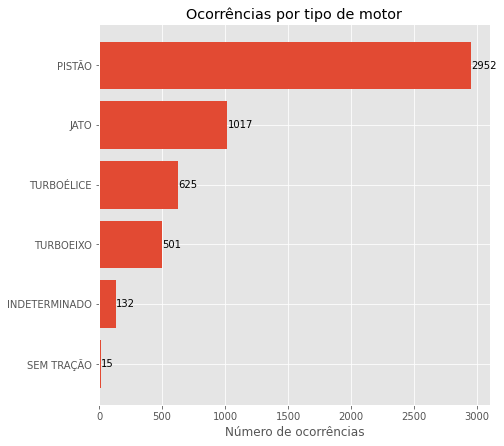

In [34]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(7, 7))

x=top_motor_tipo
y=contador_motor_tipo

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.barh(x, y,)

ax.invert_yaxis()
plt.xlabel("Número de ocorrências")
plt.title('Ocorrências por tipo de motor')

plt.show()

Identificamos que a maior índice neste período, está relacionada ao motor cilindrico de pistão, que representa 56,31% do total de ocorrências, tendo em vista que existem muitos modelos de aeronaves equipadas com este motor. Um dos problemas deste motor, está relacionado corrosão interna do cilindro causada por longa inatividade, eveltualmente trazendo falhas e acidentes, por falta de manutenção.

O tipo de motor menos frequente foi o Sem tração, devido a sua baixa demanda de fabricação.



# Quantidade de motores em aeronaves com ocorrência

In [35]:
aeronave_motor_quantidade = Counter(dados['aeronave_motor_quantidade'])
aeronave_motor_quantidade_key = sorted(aeronave_motor_quantidade, key = aeronave_motor_quantidade.get, reverse = True)
contador_aeronave_motor_quantidade = sorted(list(aeronave_motor_quantidade.values()), reverse = True)

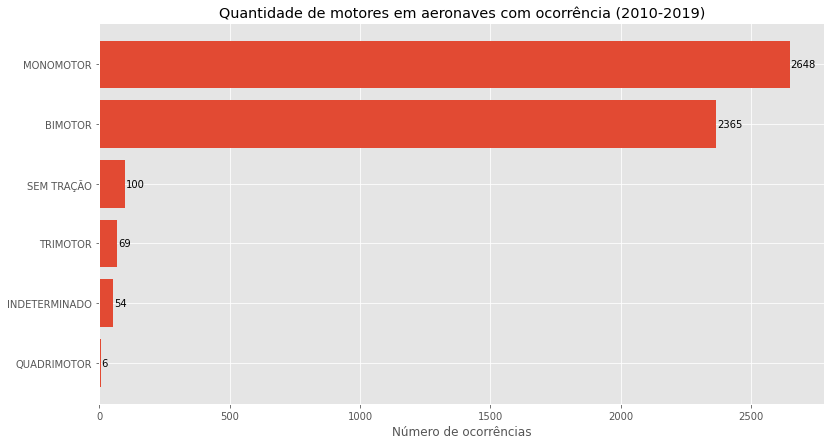

In [36]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=aeronave_motor_quantidade_key
y=contador_aeronave_motor_quantidade

ax.barh(x, y)

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências')
plt.title('Quantidade de motores em aeronaves com ocorrência (2010-2019)')
plt.show()   

Identificamos que a maior índice neste período, está relacionada ao motor cilindrico de pistão, que representa 56,31% do total de ocorrências, tendo em vista que existem muitos modelos de aeronaves equipadas com este motor. Um dos problemas deste motor, está relacionado corrosão interna do cilindro causada por longa inatividade, eveltualmente trazendo falhas e acidentes, por falta de manutenção.

O tipo de motor menos frequente foi o Sem tração, devido a sua baixa demanda de fabricação.






**ESCREVA A ANALISE AQUI**

# País de fabricação em aeronaves com ocorrência 

In [37]:
aeronave_pais_fabricante = Counter(dados['aeronave_pais_fabricante'])
top_aeronave_pais_fabricante = sorted(aeronave_pais_fabricante, key = aeronave_pais_fabricante.get, reverse = True)
contador_aeronave_pais_fabricante = sorted(list(aeronave_pais_fabricante.values()), reverse = True)

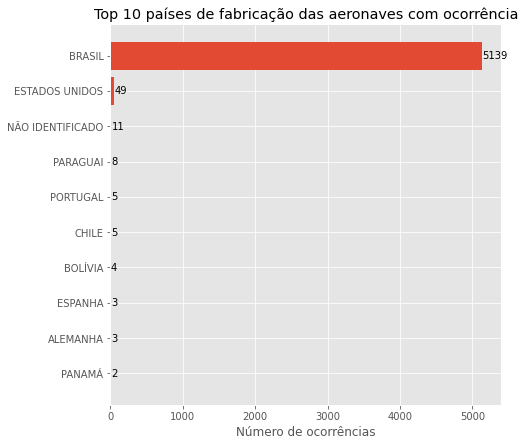

In [38]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(7, 7))

x=top_aeronave_pais_fabricante[:10]
y=contador_aeronave_pais_fabricante[:10]

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.barh(x, y,)

ax.invert_yaxis()
plt.xlabel("Número de ocorrências")
plt.title('Top 10 países de fabricação das aeronaves com ocorrência')

plt.show()

Observa-se que o pais  com mais ocorrências foi o  Brasil, com (5139) com maior número de aeronaves  em atividades.

A média de ocorrências por pais ficou em 262,10.


O pais fabricante com menos ocorrências foi o Panamá

# Ocorrências por fase de operação 

In [39]:
aeronave_fase_operacao = Counter(dados['aeronave_fase_operacao'])
top_aeronave_fase_operacao = sorted(aeronave_fase_operacao, key = aeronave_fase_operacao.get, reverse = True)
contador_aeronave_fase_operacao = sorted(list(aeronave_fase_operacao.values()), reverse = True)

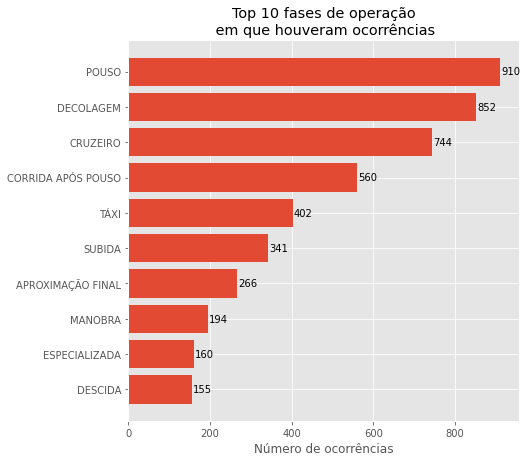

In [40]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(7, 7))

x=top_aeronave_fase_operacao[:10]
y=contador_aeronave_fase_operacao[:10]

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.barh(x, y,)

ax.invert_yaxis()
plt.xlabel("Número de ocorrências")
plt.title('Top 10 fases de operação\n em que houveram ocorrências')

plt.show()

Notamos no gráfico a fase de operação que houve mais ocorrência, foi em pouso (910), sendo relacionado no momento da decolagem e especialmente no pouso é quando ocorre a maioria dos acidentes aéreos.  Esse momento ocorre entre a aproximação final e a corrida de pouso, no qual as ocorrência são de (560) casos. Quando a aerodinâmica do avião está mais ‘diferente’ do que quando ele voa em [altitude de] cruzeiro que se encontra em terceira posição, é o momento da viagem em si, quando o avião está trafegando da origem ao destino, as velocidades são mais baixas e a proximidade com o chão limita o tempo de reação

As fases com menos ocorrências são ESPECIALIZADA (160) E DESCIDA(155). 



# Nivel de dano em aeronaves com ocorrência 

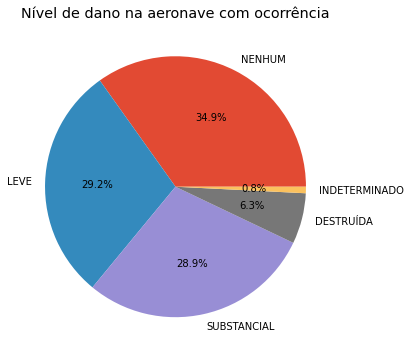

In [41]:
dados['aeronave_nivel_dano'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,title="Nível de dano na aeronave com ocorrência" ,figsize=(6, 6),label='')
plt.show()

Observamos que a maior porcentagem de ocorrência, está relacionado a 34,9%, no qual corresponde a nenhum dano gerado nas aeronaves.

A menor taxa de dano está relacionado a 0,08%, número bem abaixo, no qual não foi determinado os danos causados nas aeronaves. 

29,2% corresponde a danos leves, no qual são repareveis e não trazem risco ao voo. 

28,9% corresponde a danos SUBSTANCIAIS, são aqueles que danificaram significantemente a aeronave. Há casos em que a fuselagem foi danificada, uma asa, turbina, hélice, dentre outros. 

6,3% corresponde a aeronaves DESTRUÍDAS, no qual inclui fatalidades e acidentes graves aereos. 


# Conclusão

Buscamos trazer neste trabalho, todas as informações relacionadas as aeronaves brasileiras, entre os anos de 2010 a 2019, com os dados coletados e fornecidos pelo CENIPA.

Objetivo do trabalho é mostrar os dados e estatísticas das ocorrências aereas. Sendo um material útil para estudos, análises e pesquisas voltadas para acidentes aeronáuticos.  

Conforme analisamos os dados obtidos, com base na classificação por tipo de ocorrência, os incidentes com menor gravidade corresponde a uma taxa superior com relação a incidentes graves e acidentes,‎a ‎ ‎‎maioria ‎‎dos ‎‎casos ‎‎são ‎‎causados ‎‎por ‎‎fatores externos, ‎‎‎e ‎‎que ‎‎resulta ‎‎em ‎‎mínimos danos ‎‎‎causados as ‎‎aeronaves ou quase nenhum. Os dados obtidos por cidade e estado, verificamos que a cidade do Rio de janeiro indica a maior indice de ocorrências e São Paulo por estado. Dentro desta análise, em 2013 foi registrado o maior ano com ocorrências e o menor sendo em 2016.

Desta forma notamos que as ‎aeronaves ‎‎e ‎‎aviões ‎‎não ‎‎são ‎‎imunes ‎‎a ‎‎acidentes ‎‎e ‎‎problemas ‎‎ao longo da ‎‎história. ‎‎‎‎No entanto, ‎‎‎‎é ‎‎importante ‎‎‎‎lembrar ‎‎que, ‎‎independentemente ‎‎da ‎‎ ‎‎magnitude ‎‎‎‎do ‎‎impacto gerado pela queda de um avião, sua probabilidade de ocorrer ainda é pequena.‎ Pois existe uma vasta análise dos protocolos de segurança, no qual garante a integridade dos passageiros, sempre que ocorre algum acidente aéreo é designado uma investigação em busca de correções das falhas, para que os incidentes não voltem a acontecer em um futuro próximo. 

Concluimos que os aviões não são indestrutíveis ou absolutamente seguros, mas, mesmo em meio ao cenário atual, é uma das formas mais seguras de se viajar.




Escreva aqui a conclusao

# Bibliografia


CENIPA (2020) **Centro de Investigações e Prevenção de Acidentes Aeronáuticos** acesso em 05/2022: : https://www2.fab.mil.br/cenipa/index.php/estatisticas/panorama?download=207:sumario-estatistico-de-avioes

CENIPA (2015) **Ocorrências Aeronáuticas.** acesso em 05/2022:https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira/resource/9d8a7e09-5f75-47b3-891b-b5f1bab26d59


NAKAHARA, luiz(2021) **ACIDENTES AÉREOS: FATORES HUMANOS COMO FATOR
CONTRIBUINTE** acesso em 05/2022: https://repositorio.animaeducacao.com.br/bitstream/ANIMA/13437/1/JORGE_LUIZ_NAKAHARA_AD2_VFB.pdf


Brasil61 (2021) **46% dos acidentes aéreos são com aviões particulares e de pequeno porte** disponivel em:https://brasil61.com/n/levantamento-aponta-que-46-dos-acidentes-aereos-sao-com-aeronaves-particulares-de-porte-parecido-com-o-aviao-em-que-marilia-mendonca-viajava-bras216325

WIKIPÉDIA(2022) **Acidentes e incidentes aéreos** Disponivel em:
https://pt.wikipedia.org/wiki/Acidentes_e_incidentes_aéreos



VIDIGAL, lucas(2021) **Aviação privada é responsável por 40% dos acidentes aéreos no Brasil desde 2011; táxi aéreo responde por menos de 7%**: Disponivel em: https://g1.globo.com/mg/vales-mg/noticia/2021/11/10/acidentes-aereos-no-brasil-desde-2011.ghtml






